## Infinite Overlapping Mixture Model with Binary clusters

In [299]:
%load_ext autoreload
%autoreload 2
import utils, iomm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Synthetic Data

In [449]:
#Generate synthetic data
K=5
N=10
D=8
N_iter=10
alpha_prior = 4
burning_period=3

Z = utils.random_z(N,K)
X = utils.random_x(N,D)
theta= utils.random_theta(N,K,D,alpha_prior)

In [450]:
Z

array([[ 1.,  1.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.]])

In [451]:
X

array([[ 0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.],
       [ 1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.]])

In [452]:
theta

array([[ 0.68672605,  0.06891203,  0.16894869,  0.20467783,  0.07228697,
         0.15548061,  0.18132447,  0.96063794],
       [ 0.28496931,  0.85299085,  0.17023876,  0.57651981,  0.20369226,
         0.63254652,  0.04764368,  0.29363051],
       [ 0.79484227,  0.78763539,  0.85700516,  0.62960909,  0.97996382,
         0.5219065 ,  0.87807798,  0.93907367],
       [ 0.43008513,  0.57494757,  0.98860406,  0.58504563,  0.25760547,
         0.24169467,  0.95298888,  0.54673358],
       [ 0.19011621,  0.67751727,  0.01390983,  0.19303702,  0.96346653,
         0.52198021,  0.65648277,  0.53976671]])

#### IOMM algorithm

In [453]:
IOMM = iomm.IOMM(N = N, 
                 K = K, 
                 D = D, 
                 N_iter = N_iter, 
                 Z = Z, 
                 X = X, 
                 theta = theta, 
                 alpha_prior = alpha_prior, 
                 omega = 1,
                 copy_rows = 4,
                 burning_period=burning_period)

norm_lh[ 0 ] =  9.01362608004
norm_lh[ 1 ] =  17.8271430142
norm_lh[ 2 ] =  16.385245836
norm_lh[ 3 ] =  10.1670987223
norm_lh[ 4 ] =  64.2759392527
norm_lh = 16.385245836


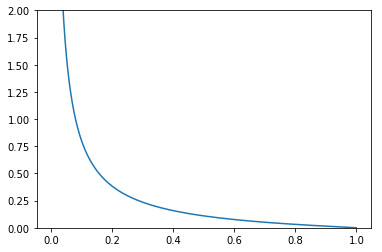

In [454]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
plt.plot(np.arange(0,1,0.001),beta.pdf(np.arange(0,1,0.001),2*0.05,0.95*2))
plt.ylim(0,2)
plt.show()

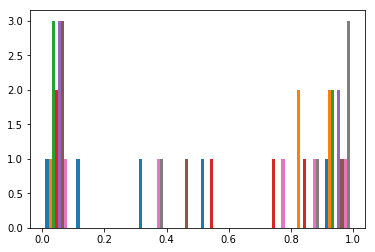

In [455]:
plt.hist(beta.rvs(1*theta,(1-theta)*1))
plt.show()

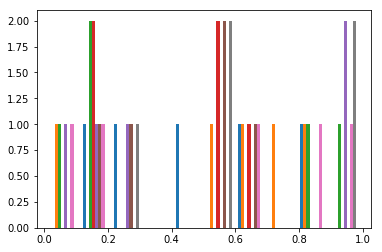

In [456]:
plt.hist(theta)
plt.show()

In [459]:
Z_hat = IOMM.learning(apply_log=False)

iteration n° 0
_______3.resample theta|Z,X using MHA_______
redraw theta 0
redraw theta 1
redraw theta 3
redraw theta 4
current theta: [ 0.05424214  0.31282536  0.00256206  0.00581946  0.45129188]
theta_k_d proposal: [  6.47328436e-003   1.62052457e-001   6.18323266e-011   2.62109561e-165
   9.40594680e-001]
joint prior current theta: [ 1.43292226  1.00932167  2.63859035  2.23930583  0.93799059]
joint prior prop theta: [  2.19212366e+00   1.15122142e+00   8.80738273e+01   6.59771291e+32
   8.09859131e-01]
likelihood current theta: [  1.00000000e+00   1.00000000e+00   1.00000000e+00   3.42637773e-05
   8.22462546e-01]
likelihood current prop: [  1.           1.           1.           0.          15.83350922]
ratio likelihood*prior 17.8115923538
transition proba current | prop : 0.117144455862
transition proba prop | current : 6.34646531414
acceptance probability = 0.328770298274
transition proba current | prop : 0.436560558097
transition proba prop | current : 0.977500821396
acceptance 

/Users/antoinegrelety/Documents/bayes_overlapping_clusters/iomm.py:265: RuntimeWarning: divide by zero encountered in log
/Users/antoinegrelety/Documents/bayes_overlapping_clusters/iomm.py:269: RuntimeWarning: invalid value encountered in multiply
/Users/antoinegrelety/Documents/bayes_overlapping_clusters/iomm.py:265: RuntimeWarning: divide by zero encountered in true_divide


 [  4.74784526e+00   8.13343856e+30   8.64955093e-01   9.20249285e-01
   8.55493101e-01]
likelihood current theta: [  1.08206820e-01   7.28925815e-12   1.00000000e+00   9.65153379e-01
   1.00000000e+00]
likelihood current prop: [  1.84523756e-08   0.00000000e+00   1.00000000e+00   9.86111925e-01
   1.00000000e+00]
ratio likelihood*prior 0.704091552114
transition proba current | prop : 0.000548633398426
transition proba prop | current : 181.464511444
acceptance probability = 2.1287255451e-06
transition proba current | prop : 5.61204527865e-153
transition proba prop | current : 9.92090447817e+151
acceptance probability = 3.98289659927e-305
transition proba current | prop : 0.509024671916
transition proba prop | current : 0.55692220114
acceptance probability = 0.643536872079
transition proba current | prop : 0.6367604326
transition proba prop | current : 0.63646730665
acceptance probability = 0.704415822509
transition proba current | prop : 0.766715104969
transition proba prop | current :

transition proba prop | current : 0.643936854907
acceptance probability = 1.9049697357
transition proba current | prop : 0.0345091397896
transition proba prop | current : 9.81607102175
acceptance probability = 0.00684129621458
transition proba current | prop : 0.717952096229
transition proba prop | current : 0.656726136898
acceptance probability = 2.12741942306
current theta: [ 0.92928833  0.91399626  0.23351847  0.16567852  0.82811339]
theta_k_d proposal: [ 0.99140555  0.91525574  0.52547274  0.230965    0.94272933]
joint prior current theta: [ 0.81182027  0.81451878  1.07010339  1.14613757  0.83075321]
joint prior prop theta: [ 0.80138225  0.81429449  0.90987126  1.07245913  0.80949204]
likelihood current theta: [ 13.14193636  10.62740138   1.           1.           1.        ]
likelihood current prop: [ 115.35409517   10.80020871    1.            1.            1.        ]
ratio likelihood*prior 4.64994727088
transition proba current | prop : 0.118866689923
transition proba prop | cu

transition proba prop | current : 7.5765128009
acceptance probability = 0.0855933511754
transition proba current | prop : 0.922159181331
transition proba prop | current : 0.497052604557
acceptance probability = 46.3501466501
current theta: [ 0.91883254  0.0876387   0.01056112  0.82270222  0.00286023]
theta_k_d proposal: [  9.99838265e-001   7.57276542e-001   3.19173745e-010   8.71319687e-001
   1.49403568e-246]
joint prior current theta: [ 0.81365953  1.30181958  1.98768681  0.83184317  2.58112946]
joint prior prop theta: [  8.00025880e-01   8.45744313e-01   6.34285167e+01   8.22345806e-01
   1.17008603e+49]
likelihood current theta: [  1.13202087e+01   9.22695041e-03   1.00000000e+00   4.64022858e+00
   1.00000000e+00]
likelihood current prop: [  6.18196532e+03   9.73386926e+00   1.00000000e+00   6.77119653e+00
   1.00000000e+00]
ratio likelihood*prior 6.62879440121e+47
transition proba current | prop : 0.00199182321114
transition proba prop | current : 244.425166089
acceptance probab

/Users/antoinegrelety/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:377: RuntimeWarning: overflow encountered in exp
  return np.exp(self._logpdf(x, a, b))


 2.92509206406e+38
transition proba current | prop : 0.0893910628194
transition proba prop | current : 7.5404781873
acceptance probability = 3.46764597624e+36
transition proba current | prop : 2.45248423907e-07
transition proba prop | current : 343216.527546
acceptance probability = 2.09015056362e+26
transition proba current | prop : 1.97952657808e-05
transition proba prop | current : 5499.65894656
acceptance probability = 1.05284664747e+30
transition proba current | prop : 0.116318482947
transition proba prop | current : 0.963100537713
acceptance probability = 3.53278041127e+37
transition proba current | prop : 4.61353754989e-195
transition proba prop | current : 5.92705835993e+193
acceptance probability = 0.0
redraw theta 2
current theta: [ 0.00860611  0.02259056  0.81660798  0.20558656  0.10782415]
theta_k_d proposal: [  2.84361343e-124   7.91517870e-005   5.63529317e-001   1.38013120e-002
   1.32323255e-001]
joint prior current theta: [ 2.07075455  1.70727931  0.83308106  1.0977186

likelihood current prop: [  3.75229078e-12   3.20916680e-81   1.00000000e+00   1.86761142e-99
   1.00000000e+00]
ratio likelihood*prior 5.17639061401e+12
transition proba current | prop : 2.80098890298e-11
transition proba prop | current : 1021337491.27
acceptance probability = 1.41961034342e-07
transition proba current | prop : 2.97766680702e-78
transition proba prop | current : 2.75024543443e+77
acceptance probability = 5.6044330875e-143
transition proba current | prop : 1.30071021236e-65
transition proba prop | current : 5.40655111284e+64
acceptance probability = 1.24533810821e-117
transition proba current | prop : 1.47222003333e-47
transition proba prop | current : 4.86537035855e+46
acceptance probability = 1.56633213931e-81
transition proba current | prop : 9.88896808649e-22
transition proba prop | current : 6.35596961767e+20
acceptance probability = 8.05371401443e-30
current theta: [ 0.03275398  0.03588179  0.02399446  0.69025181  0.81108826]
theta_k_d proposal: [  3.59706392e-07

transition proba prop | current : 42.2160341531
acceptance probability = 2.20062628408
transition proba current | prop : 1.33567199183e-32
transition proba prop | current : 3.78731413004e+31
acceptance probability = 2.15739933491e-60
transition proba current | prop : 2.9146846063e-21
transition proba prop | current : 2.94707584302e+20
acceptance probability = 6.05009653368e-38
current theta: [ 0.00860611  0.00541241  0.00953537  0.01380131  0.16147814]
theta_k_d proposal: [  4.59696846e-94   1.28279960e-06   1.10581077e-95   2.37603327e-24
   8.32804504e-02]
joint prior current theta: [ 2.07075455  2.27201825  2.02872191  1.88410851  1.15203916]
joint prior prop theta: [  3.72045180e+18   1.20630804e+01   7.84068170e+18   4.24540849e+04
   1.31516843e+00]
likelihood current theta: [ 1.          1.          1.          0.01399445  1.        ]
likelihood current prop: [  1.00000000e+00   1.00000000e+00   1.00000000e+00   2.37603327e-24
   1.00000000e+00]
ratio likelihood*prior 1.53129605

transition proba current | prop : 1.59951988343e-08
transition proba prop | current : 45984086.5629
acceptance probability = 3.02528102426e-15
transition proba current | prop : 1.32415152852
transition proba prop | current : 0.40656660688
acceptance probability = 28.3262853093
the acceptance rate was: 0.45
iteration n° 8
i = 4
___________1.compute probability of observation i taking category k_________
k= 0
proba Z=1: 60.4407650438
proba Z=1: 18.1408196427
proba Z=1: 0.0
proba Z=1: 0.0989256092999
k= 4
proba Z=1: 3.50124091982e-05
_________2.propose adding new clusters________
accepted for k = 0
i = 5
___________1.compute probability of observation i taking category k_________
proba Z=1: 0.017968012279
k= 1
proba Z=1: 6.06768463799e-05
proba Z=1: 0.0
proba Z=1: 4753167.61921
k= 4
proba Z=1: 3.57478809785e-06
_________2.propose adding new clusters________
i = 6
___________1.compute probability of observation i taking category k_________
k= 0
proba Z=1: 0.000563545844215
proba Z=1: 1.521

acceptance probability = nan
transition proba current | prop : 0.0799438418148
transition proba prop | current : 1.66870634923
acceptance probability = nan
current theta: [ 0.12732504  0.76186395  0.77862277  0.83511054  0.03329081]
theta_k_d proposal: [  5.16358329e-02   7.18529512e-01   9.96946004e-01   9.59665749e-01
   4.40475863e-27]
joint prior current theta: [ 1.20811207  0.84472336  0.84105533  0.82935639  1.57988366]
joint prior prop theta: [  1.44710402e+00   8.54675126e-01   8.00489537e-01   8.06614432e-01
   1.49384509e+05]
likelihood current theta: [ 1.  1.  1.  1.  1.]
likelihood current prop: [ 1.  1.  1.  1.  1.]
ratio likelihood*prior 28169.8534965
transition proba current | prop : 0.365566652992
transition proba prop | current : 1.65720769777
acceptance probability = 6214.04249559
transition proba current | prop : 0.745246150871
transition proba prop | current : 0.615421014127
acceptance probability = 34112.379017
transition proba current | prop : 0.0137423434447
tran

In [276]:
Z_hat

array([[ 0.,  1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  0.,  1.,  1.],
       [ 1.,  1.,  0.,  1.,  1.],
       [ 1.,  1.,  0.,  1.,  1.],
       [ 1.,  1.,  0.,  1.,  1.],
       [ 1.,  1.,  0.,  1.,  1.],
       [ 1.,  1.,  0.,  1.,  1.]])

In [277]:
Z

array([[ 0.,  1.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  1.],
       [ 1.,  1.,  0.,  0.,  0.]])